In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
spec = fits.open('/Users/imedan/sas/sdsswork/bhm/boss/spectro/redux/master/'\
                  'spectra/full/104193/60087/spec-104193-60087-27021598685558821.fits')[1].data

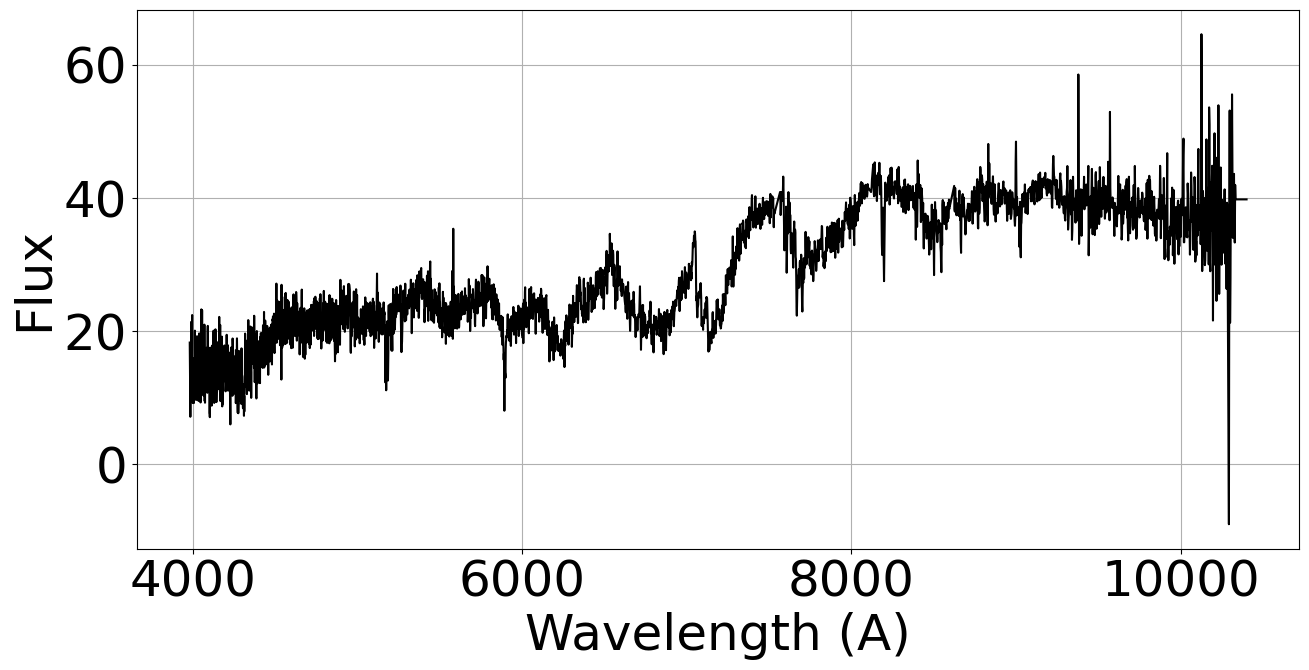

In [3]:
f, ax1 = plt.subplots(1, 1, figsize=(15, 7))

ax1.plot(10 ** spec.LOGLAM[spec.LOGLAM > 3.6],
         spec.FLUX[spec.LOGLAM > 3.6], c='k')
ax1.set_xlabel('Wavelength (A)')
ax1.set_ylabel('Flux')
ax1.grid()
plt.show()

In [4]:
from mdwarf_contin.normalize import ContinuumNormalize

In [5]:
norm = ContinuumNormalize(spec.LOGLAM[spec.LOGLAM > 3.6], spec.FLUX[spec.LOGLAM > 3.6])

In [6]:
norm.find_continuum()

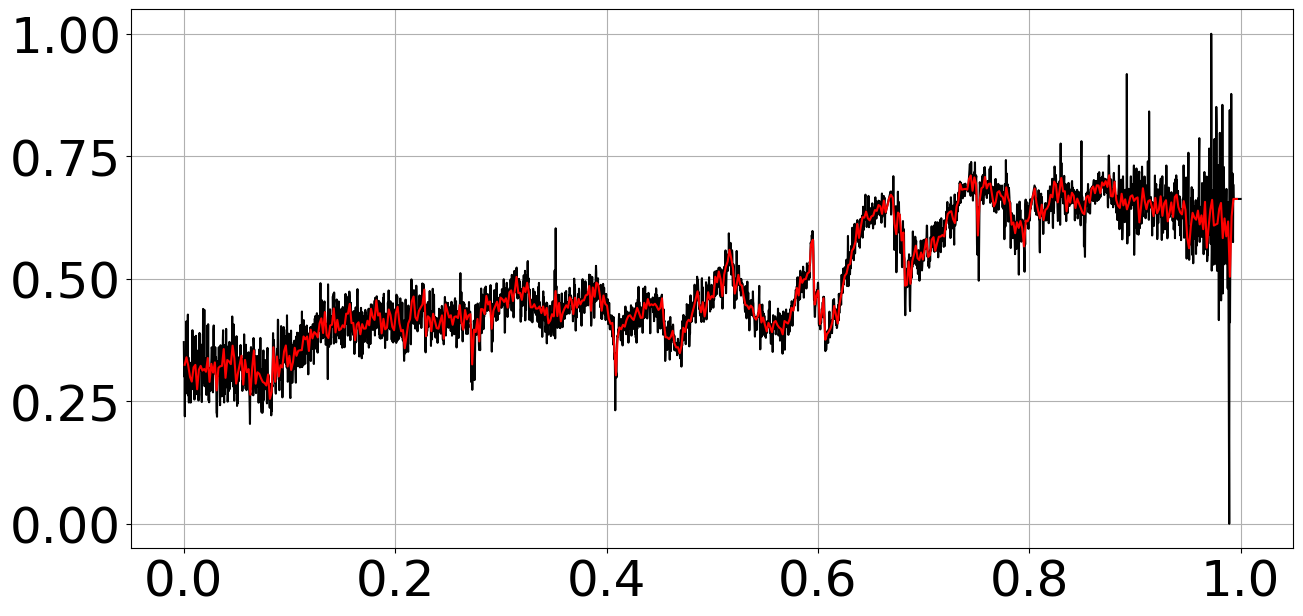

In [8]:
# plot the median filter spectrum

f, ax1 = plt.subplots(1, 1, figsize=(15, 7))

ax1.plot(norm.loglam_norm, norm.flux_norm, c='k')
ax1.plot(norm.loglam_med, norm.flux_med, c='r')
ax1.grid()
plt.show()

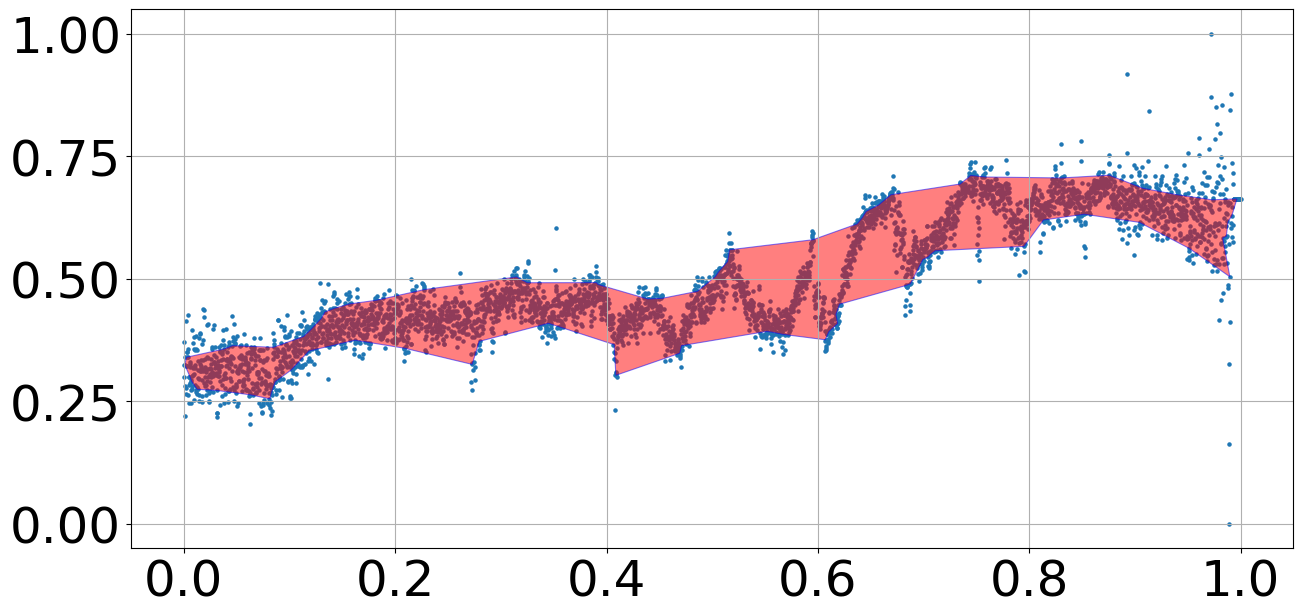

In [6]:
from alpha_shapes import plot_alpha_shape

# plot the alpha shape
f, ax1 = plt.subplots(1, 1, figsize=(15, 7))

ax1.scatter(norm.loglam_norm, norm.flux_norm, s=5)
plot_alpha_shape(ax1, norm.alpha_shape)
ax1.grid()
plt.show()

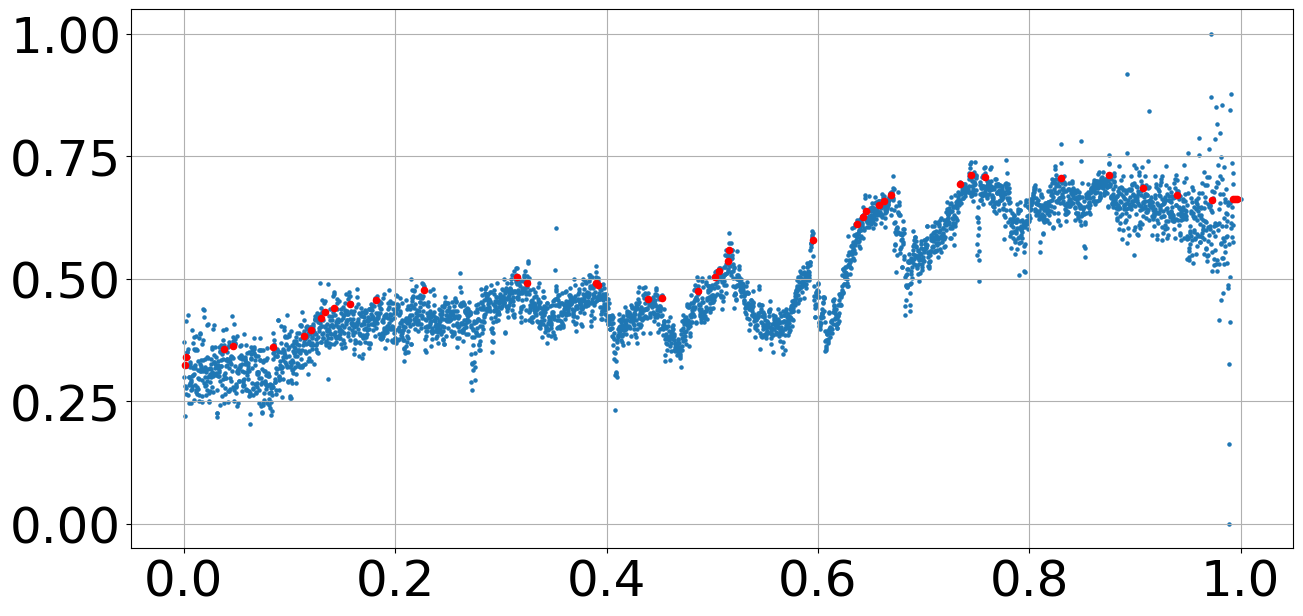

In [7]:
# plot the maximum points in the alpha shape
f, ax1 = plt.subplots(1, 1, figsize=(15, 7))

ax1.scatter(norm.loglam_norm, norm.flux_norm, s=5)
ax1.scatter(norm.loglam_max, norm.flux_max, s=20, c='r')
ax1.grid()
plt.show()

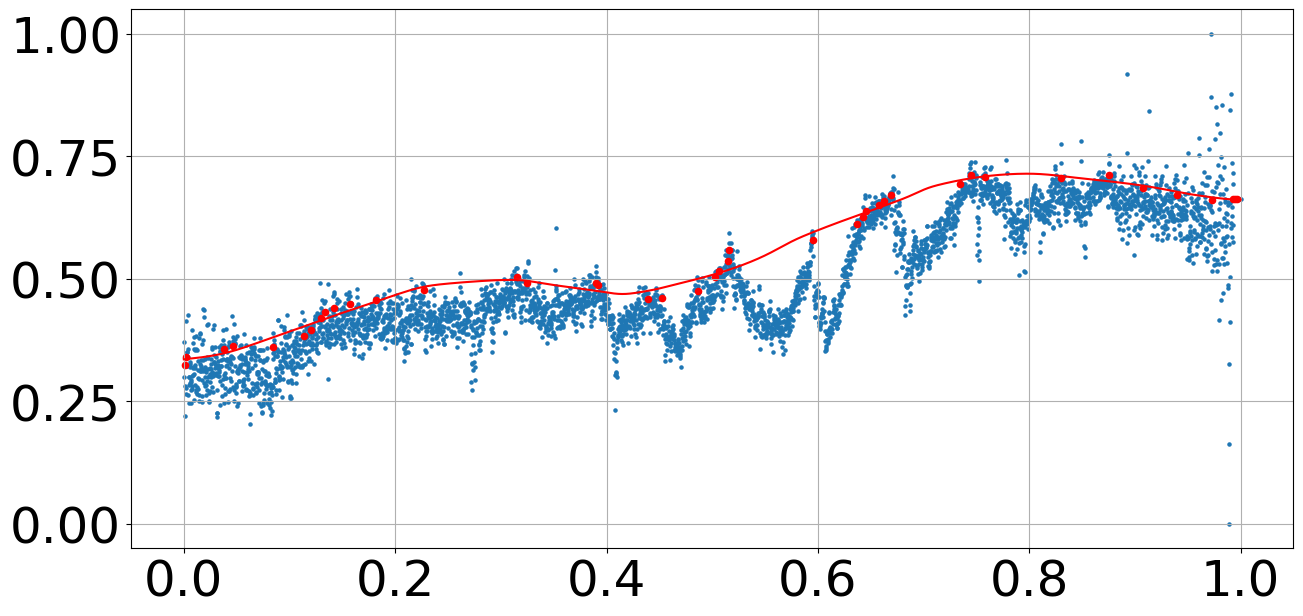

In [8]:
# plot the polynomial regression
f, ax1 = plt.subplots(1, 1, figsize=(15, 7))

ax1.scatter(norm.loglam_norm, norm.flux_norm, s=5)
ax1.scatter(norm.loglam_max, norm.flux_max, s=20, c='r')
ax1.plot(norm.loglam_norm, norm.continuum, c='r')
ax1.grid()
plt.show()

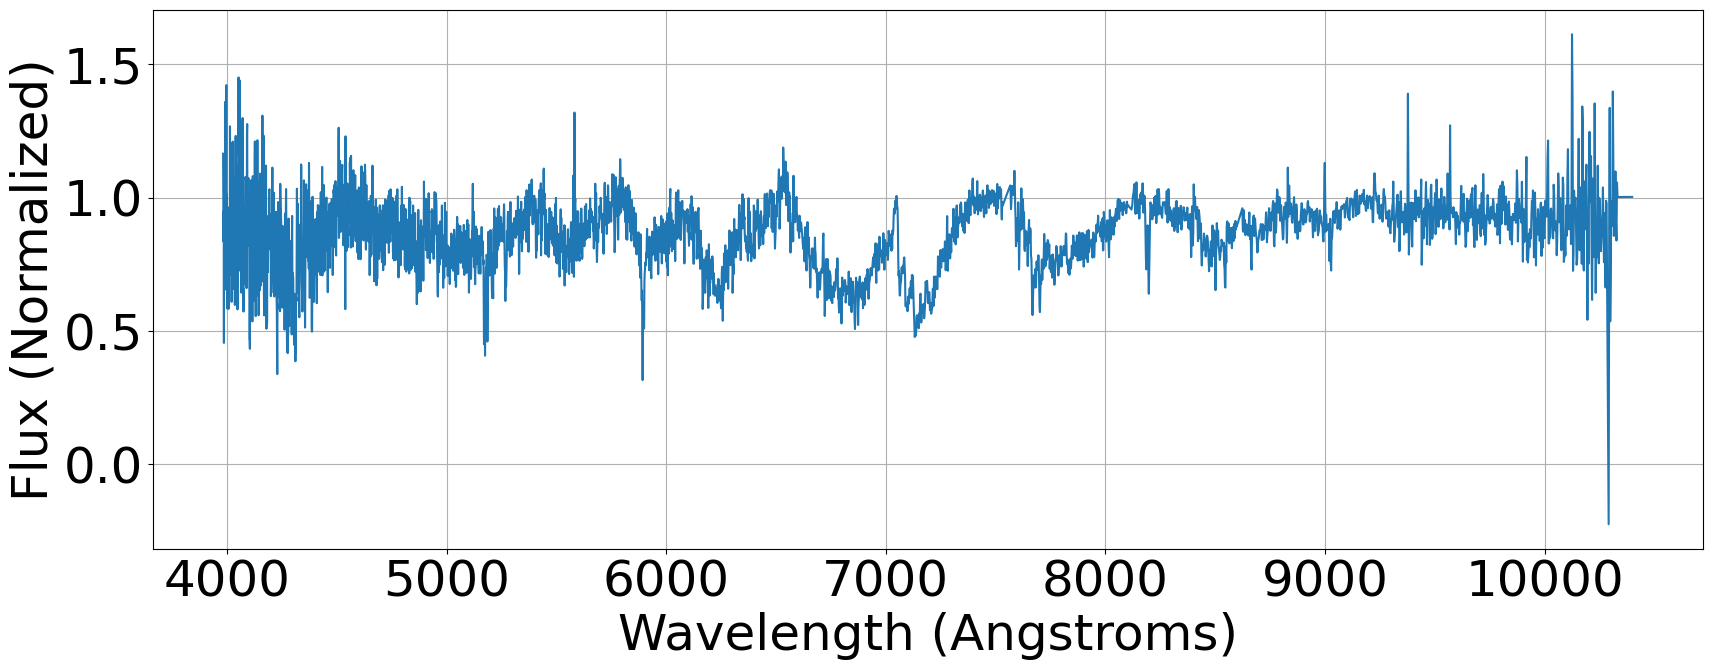

In [11]:
import numpy as np

# plot normalized specrum

plt.figure(figsize=(20, 7))
plt.plot(10 ** norm.loglam, 
         (norm.flux_norm * (np.nanmax(norm.flux) - np.nanmin(norm.flux)) + np.nanmin(norm.flux)) / 
         (norm.continuum * (np.nanmax(norm.flux) - np.nanmin(norm.flux)) + np.nanmin(norm.flux)))
plt.grid()
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (Normalized)')
plt.show()